In [2]:
#@save
import collections
from collections import defaultdict
from IPython import display
import math
from matplotlib import pyplot as plt
import os
import pandas as pd
import random
import re
import shutil
import sys
import tarfile
import time
import requests
import zipfile
import hashlib
d2l = sys.modules[__name__]

Matplotlib is building the font cache; this may take a moment.


In [1]:
!pip install mxnet

     |████████████████████████████████| 55.0 MB 9.7 MB/s eta 0:00:01��████                          | 10.3 MB 4.2 MB/s eta 0:00:114.2 MB/s eta 0:00:1018.5 MB 4.2 MB/s eta 0:00:09ta 0:00:01
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.13.2
    Uninstalling graphviz-0.13.2:
      Successfully uninstalled graphviz-0.13.2


In [3]:
from mxnet import np, npx


In [4]:
x = np.array([1,2,4,8])
y = np.array([2,2,2,2])

x+y, x-y, x*y, x/y, x**y

(array([ 3.,  4.,  6., 10.]),
 array([-1.,  0.,  2.,  6.]),
 array([ 2.,  4.,  8., 16.]),
 array([0.5, 1. , 2. , 4. ]),
 array([ 1.,  4., 16., 64.]))

In [5]:
# 2.1.6

A = x.asnumpy() # use x since X isn't defined
B=np.array(A)
type(A), type(B)

(numpy.ndarray, mxnet.numpy.ndarray)

In [6]:
a = np.array([3.5])
a, a.item(), float(a), int(a)

(array([3.5]), 3.5, 3.5, 3)

In [7]:
# 2.2.1

import os

def mkdir_if_not_exist(path): #@save
  """Make a directory if it does not exist."""
  if not isinstance(path, str):
    path = os.path.join(*path)
  if not os.path.exists(path):
    os.makedirs(path)

In [8]:
data_file = '../data/house_tiny.csv'
mkdir_if_not_exist('../data')
with open(data_file, 'w') as f:
  f.write('NumRooms,Alley,Price\n') # Column names
  f.write('NA,Pave,127500\n') # Each row represents a data example
  f.write('2,NA,106000\n')
  f.write('4,NA,178100\n')
  f.write('NA,NA,140000\n')

In [9]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [10]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [11]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [12]:
X, y = np.array(inputs.values), np.array(outputs.values)
X, y

(array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=float64),
 array([127500, 106000, 178100, 140000], dtype=int64))

In [2]:
# 2.4.1 Derivatives

%matplotlib inline
from d2l import mxnet as d2l
from IPython import display
from mxnet import np, npx
npx.set_np()
def f(x):
  return 3 * x ** 2 - 4 * x

In [3]:
def numerical_lim(f, x, h):
  return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
  print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
  h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [4]:
def use_svg_display(): #@save
  """Use the svg format to display a plot in Jupyter."""
  display.set_matplotlib_formats('svg')  

In [5]:
def set_figsize(figsize=(3.5, 2.5)): #@save
  """Set the figure size for matplotlib."""
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize

In [6]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
  """Set the axes for matplotlib."""
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel)
  axes.set_xscale(xscale)
  axes.set_yscale(yscale)
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  if legend:
    axes.legend(legend)
  axes.grid()

In [7]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
ylim=None, xscale='linear', yscale='linear',
fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
  """Plot data points."""
  if legend is None:
    legend = []

  set_figsize(figsize)
  axes = axes if axes else d2l.plt.gca()

  # Return True if `X` (tensor or list) has 1 axis
  def has_one_axis(X):
    return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
            and not hasattr(X[0], "__len__"))
  if has_one_axis(X):
    X = [X]
  if Y is None:
    X, Y = [[]] * len(X), X
  elif has_one_axis(Y):
    Y = [Y]
  if len(X) != len(Y):
    X = X * len(Y)

  axes.cla()
  for x, y, fmt in zip(X, Y, fmts):
    if len(x):
      axes.plot(x, y, fmt)
    else:
      axes.plot(y, fmt)
  set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

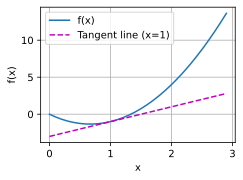

In [8]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [1]:
# 2.5
from mxnet import autograd, np, npx
npx.set_np()

In [2]:
x =np.arange(4.0)
x

array([0., 1., 2., 3.])

In [3]:
# We allocate memory for a tensor's gradient by invoking `attach_grad`
x.attach_grad()
# After we calculate a gradient taken with respect to `x`, we will be able to
# access it via the `grad` attribute, whose values are initialized with 0s
x.grad

array([0., 0., 0., 0.])

In [4]:
# Place our code inside an `autograd.record` scope to build the computational
# graph
with autograd.record():
    y = 2 * np.dot(x, x)
y

array(28.)

In [5]:
y.backward()
x.grad

array([ 0.,  4.,  8., 12.])

In [6]:
x.grad == 4*x

array([ True,  True,  True,  True])

In [7]:
with autograd.record():
    y = x.sum()
y.backward()
x.grad # Overwritten by the newly calculated gradient

array([1., 1., 1., 1.])

In [8]:
# When we invoke `backward` on a vector-valued variable `y` (function of `x`),
# a new scalar variable is created by summing the elements in `y`. Then the
# gradient of that scalar variable with respect to `x` is computed
with autograd.record():
    y = x * x # `y` is a vector
y.backward()
x.grad # Equals to y = sum(x * x)

array([0., 2., 4., 6.])

In [9]:
with autograd.record():
    y = x * x
    u = y.detach()
    z = u * x
z.backward()
x.grad == u

array([ True,  True,  True,  True])

In [10]:
y.backward()
x.grad == 2 *x

array([ True,  True,  True,  True])

In [11]:
# 2.5.4

def f(a):
    b = a * 2
    while np.linalg.norm(b) < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [12]:
a = np.random.normal()
a.attach_grad()
with autograd.record():
    d = f(a)
d.backward()

In [13]:
a.grad == d/a

array(True)

In [14]:
# 2.6

%matplotlib inline
from d2l import mxnet as d2l
from mxnet import np, npx
import random
npx.set_np()

In [15]:
fair_probs = [1.0 / 6] * 6
np.random.multinomial(1, fair_probs)

array([0, 0, 0, 0, 0, 1], dtype=int64)

In [16]:
fair_probs

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [17]:
np.random.multinomial(10, fair_probs)

array([0, 1, 5, 1, 1, 2], dtype=int64)

In [21]:
counts = np.random.multinomial(100000, fair_probs).astype(np.float32)
counts / 1000

array([16.765, 16.563, 16.679, 16.751, 16.709, 16.533])

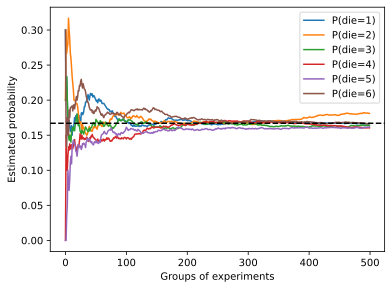

In [22]:
counts = np.random.multinomial(10, fair_probs, size=500)
cum_counts = counts.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),
                label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();